ADD LABEL IMBALANCE

In [ ]:
try:
  data_path_in = f'{folder}/data/filtered_pandora.json'
  data_path_out = f'{folder}/data/intermediate/cleaned.json'
  from_nb = True
except:
  data_path_in = r'/content/drive/MyDrive/digital text analysis/NLP/shared task/data/filtered_pandora.json'
  data_path_out = r'/content/drive/MyDrive/digital text analysis/NLP/shared task/data/intermediate/cleaned.json'
  from_nb = False


In [ ]:
import json
import os
try:
    import pandas as pd
except ImportError:
    %pip install pandas
    import pandas as pd
try:
    import numpy as np
except ImportError:
    %pip install numpy
    import numpy as np
try:
    import random
except ImportError:
    %pip install random
    import random
try:
    import itertools
except ImportError:
    %pip install itertools
    import itertools

try:
    from tqdm import tqdm
except ImportError:
    %pip install tqdm
    from tqdm import tqdm


In [ ]:
import json
import pandas as pd
with open(data_path_in, 'r') as f:
    data = json.load(f)
authors = data['authors']

In [ ]:
#common
all_comments = [comment for author in authors for comment in author['comments']]

num_comments = sum(len(author['comments']) for author in authors)
num_authors = len(authors)
print(f'Num comments: {num_comments}')
print(f'Num authors: {num_authors}')

avg_comments_per_author = num_comments/num_authors
print(f'Avg comments per author: {avg_comments_per_author}')

avg_comment_len_char = sum(len(comment) for comment in all_comments) / num_comments
print(f'Avg comment length in chars: {avg_comment_len_char}')

avg_comment_length_words = sum([len(comment.split()) for author in authors for comment in author['comments']])/sum(len(author['comments']) for author in authors)
print(f'Avg comment length in words: {avg_comment_length_words}')



Num comments: 2587600
Num authors: 1568
Avg comments per author: 1650.2551020408164
Avg comment length in chars: 234.6081844179935
Avg comment length in words: 40.960308780336995


In [ ]:
#TEMP CLEAN



In [ ]:
import numpy as np

def calculate_z_scores(data):
  # Convert the input data to a numpy array for easier calculations
  data = np.array(data)

  # Calculate the mean and standard deviation
  mean = np.mean(data)
  std_dev = np.std(data)

  # Avoid division by zero if standard deviation is zero
  if std_dev == 0:
    return np.zeros_like(data) # Return an array of zeros if std_dev is 0

  # Calculate Z-scores
  z_scores = (data - mean) / std_dev

  return z_scores

In [ ]:
#create df

comment_rows = []
for author in data['authors']:
    author_id = author['id']
    author_labels = {
        'extraversion': author['labels']['extraversion'],
        'agreeableness': author['labels']['agreeableness'],
        'neuroticism': author['labels']['neuroticism'],
        'conscientiousness': author['labels']['conscientiousness'],
        'openness': author['labels']['openness']
    }


    for comment in author['comments']:

        new_row = {
            'author_id': author_id,
            'comment_text': comment,
            'comment_text_split': comment.split()
        }
        # Add the author's labels to the new row
        new_row.update(author_labels)
        # Append the new row to the list
        comment_rows.append(new_row)

# Create the new DataFrame from the list of comment rows
df = pd.DataFrame(comment_rows)

# Display the head of the new DataFrame to verify
print(df.head())

     author_id                                       comment_text  \
0  -Areopagan-  Yeah I wouldnt want to deal with someone like ...   
1  -Areopagan-  I suggest the future. You aren't going back in...   
2  -Areopagan-  I have two friends. I alienate everyone, event...   
3  -Areopagan-  Your first and second question is the same que...   
4  -Areopagan-  I am smarter than you and will work you into d...   

                                  comment_text_split  extraversion  \
0  [Yeah, I, wouldnt, want, to, deal, with, someo...           0.6   
1  [I, suggest, the, future., You, aren't, going,...           0.6   
2  [I, have, two, friends., I, alienate, everyone...           0.6   
3  [Your, first, and, second, question, is, the, ...           0.6   
4  [I, am, smarter, than, you, and, will, work, y...           0.6   

   agreeableness  neuroticism  conscientiousness  openness  
0            0.0         0.01               0.96      0.99  
1            0.0         0.01             

In [ ]:
df.isnull().sum()

,0
author_id,0
comment_text,0
extraversion,0
agreeableness,0
neuroticism,0
conscientiousness,0
openness,0


In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df.comment_text[0]

'Yeah I wouldnt want to deal with someone like me either. Move along. ��'

In [ ]:
comment_counts = []
len_dict = {}
for author in authors:
    len_dict[author['id']] = len(author['comments'])
    comment_counts.append(len(author['comments']))
comment_counts = sorted(comment_counts)
len_dict = dict(sorted(len_dict.items(), key=lambda item: item[1], reverse=True))
len_dict

{'myexsparamour': 51746,
 'WittyOriginalName': 42027,
 'fifthchevron': 41576,
 'Silverlight42': 28918,
 'Q1189998819991197253': 26492,
 'Shadow_Of_': 24116,
 'Yokuo': 23540,
 'Disrupturous': 23252,
 'Holophonist': 22955,
 'ishabad': 20033,
 'Lastrevio': 19213,
 'staaamos': 19001,
 'kit094': 18674,
 'Format137_BossMode': 18657,
 'joshually': 18508,
 'HellhoundsOnMyTrail': 17748,
 'zugzwang_03': 16992,
 'Altiondsols': 15804,
 'overscore_': 15564,
 '1fastman1': 15220,
 'CrushHazard': 15130,
 'Purples_A_Fruit': 15102,
 'aberthin': 14703,
 'Sorcatarius': 14546,
 'FuckTheSooners': 14214,
 'joantheunicorn': 13782,
 'ViperSRT3g': 13331,
 'Deroni76': 13275,
 'pikachuuuuu': 13261,
 'laidymondegreen': 13058,
 'heliotach712': 13052,
 'HippeHoppe': 13028,
 'mmzznnxx': 12773,
 'freejosephk': 12303,
 'Kodiologist': 12123,
 'Dungeon567': 12114,
 'TheTweets': 11956,
 'sprankton': 11873,
 'pearlz176': 11627,
 'ClutchHunter': 11560,
 'heisgone': 11348,
 'vayyiqra': 11311,
 'DomCaboose': 10999,
 'kai333':

Avg comment length

In [ ]:
df['comment_length'] = df['comment_text_split'].apply(len)
average_comment_length = df['comment_length'].mean()
print(f"The average comment length is: {average_comment_length}")

The average comment length is: 40.960308780336995


Number of comments

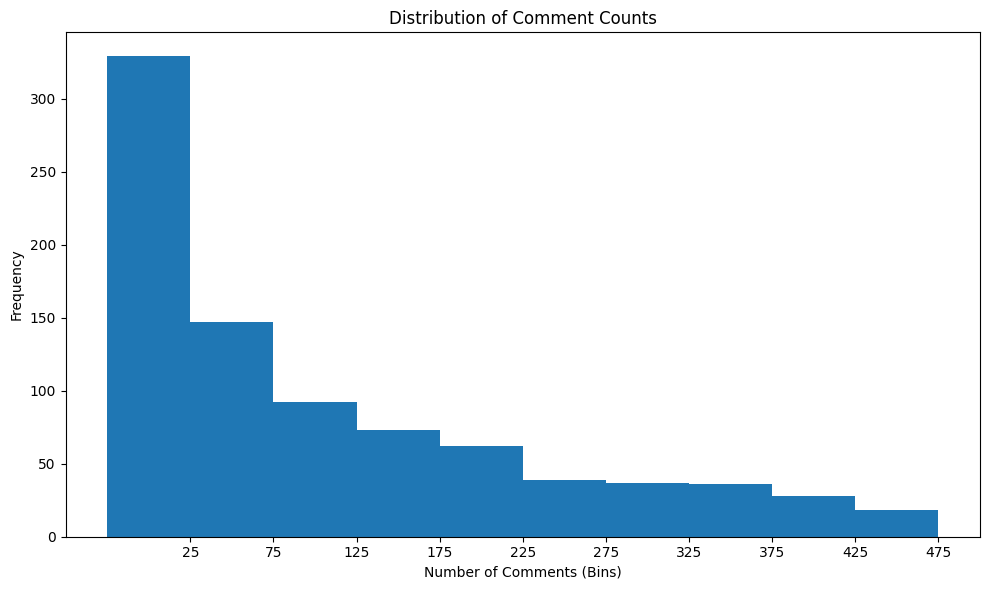

In [ ]:
#we get a nice zipfian distribution
import matplotlib.pyplot as plt
import numpy as np

# Assuming len_dict is already populated

# Define bin edges
bin_edges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Create histogram data
hist, bins = np.histogram(list(len_dict.values()), bins=bin_edges)

# Sort bins and counts in descending order (This part is modified)
sorted_indices = np.argsort(hist)[::-1]
sorted_hist = hist[sorted_indices]
sorted_bins = bins[:-1]  # Remove the last edge to match the frequency values



# Create bar plot with sorted bins
plt.figure(figsize=(10, 6))
plt.bar(sorted_bins, sorted_hist, width=bins[1] - bins[0])  # Adjust width as needed
plt.xlabel("Number of Comments (Bins)")
plt.ylabel("Frequency")
plt.title("Distribution of Comment Counts")
#plt.xticks(sorted_bins[:-1] + (bins[1] - bins[0]) / 2) # Center x-axis ticks on bins (This is modified)
plt.xticks(sorted_bins + (bins[1] - bins[0]) / 2) # Center x-axis ticks on bins
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats

comment_counts = list(len_dict.values())

# Calculate Z-scores
z_scores = stats.zscore(comment_counts)

# Define outlier threshold (e.g., Z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = [count for i, count in enumerate(comment_counts) if abs(z_scores[i]) > threshold]

print("Outlier comment counts (Z-score method):", outliers)

Label correlation

In [ ]:
label_corr = df_labels[traits].corr()
sns.heatmap(label_corr, annot=True, cmap="coolwarm")
plt.title("Label Correlation Matrix")
plt.show()

NameError: name 'df_labels' is not defined

class imbalance

In [ ]:
def rework_labels(df):
  low_threshold = 33
  high_threshold = 66
  for col in df.columns:
    if col == 'neuroticism':
      df[col] = pd.cut(df[col], bins=[0, low_threshold, high_threshold, 100], labels=['high', 'medium', 'low'], include_lowest=True, right=True)
      df = df.rename(columns={'neuroticism': 'Emotional stability'})
    else:
      df[col] = pd.cut(df[col], bins=[0, low_threshold, high_threshold, 100], labels=['low', 'medium', 'high'], include_lowest=True, right=True)
  return df
df_labels = rework_labels(df_labels)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

traits = ["extraversion", "agreeableness", "Emotional stability", "conscientiousness", "openness"]

for trait in traits:
    plt.figure()
    sns.countplot(x=trait, data=df_labels)
    plt.title(f"Class Distribution for {trait}")
    plt.show()

class imbalance

Counts for extraversion: {'low': 837, 'medium': 395, 'high': 339}
Counts for agreeableness: {'low': 718, 'medium': 418, 'high': 435}
Counts for neuroticism: {'low': 569, 'medium': 402, 'high': 600}
Counts for conscientiousness: {'low': 752, 'medium': 441, 'high': 378}
Counts for openness: {'low': 295, 'medium': 437, 'high': 839}


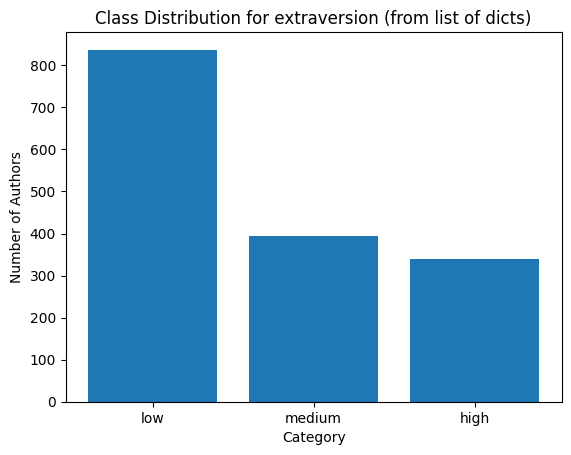

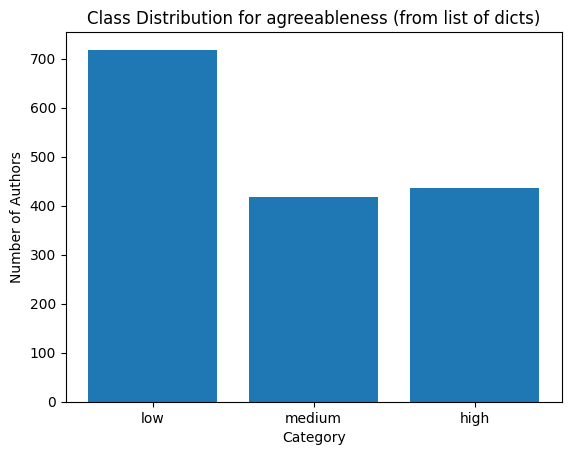

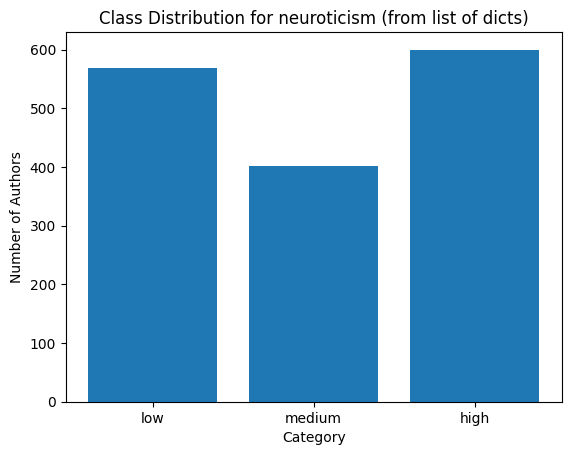

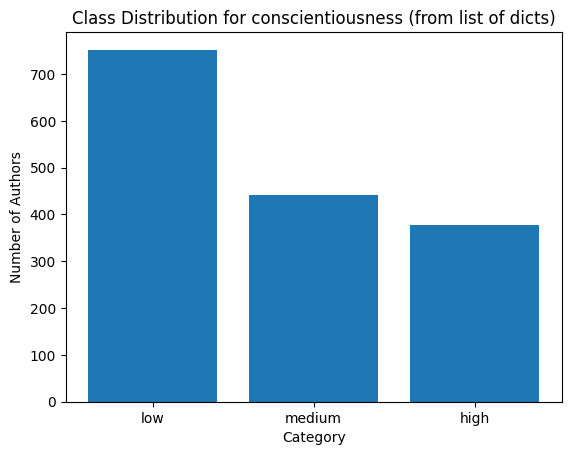

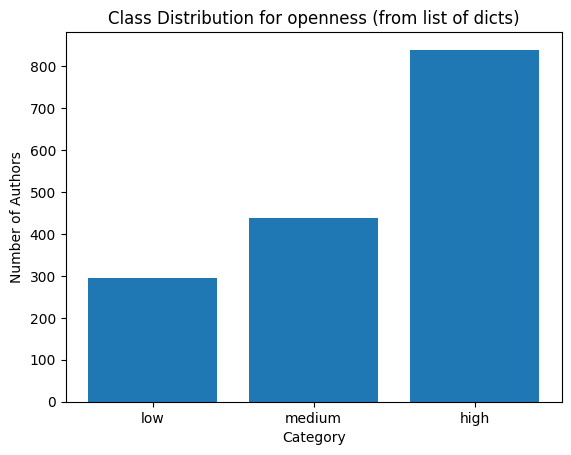

In [ ]:
# Assuming 'authors' is your list of dictionaries with author data

def rework_labels_dict(author_labels):
  """
  Reworks the labels for a single author dictionary.
  """
  low_threshold = 0.33
  high_threshold = 0.66
  reworked = {}
  for trait, value in author_labels.items():
    if value <= low_threshold:
      reworked[trait] = 'low'
    elif value <= high_threshold:
      reworked[trait] = 'medium'
    else:
      reworked[trait] = 'high'
  return reworked
import json
with open('/content/drive/MyDrive/digital text analysis/NLP/shared task/data/filtered_pandora.json', 'r', encoding='utf-8') as f: #ADD FOLDER
    data = json.load(f)
authors = data['authors']
# Process all authors and categorize their labels
categorized_labels_list = []
for author in authors:
    author_labels = {
        'extraversion': author['labels']['extraversion'],
        'agreeableness': author['labels']['agreeableness'],
        'neuroticism': author['labels']['neuroticism'],
        'conscientiousness': author['labels']['conscientiousness'],
        'openness': author['labels']['openness']
    }
    categorized_labels_list.append(rework_labels_dict(author_labels))

# Count the categories for each trait
trait_counts = {}
traits = ["extraversion", "agreeableness", "neuroticism", "conscientiousness", "openness"]

for trait in traits:
    trait_counts[trait] = {'low': 0, 'medium': 1, 'high': 2}
    for author_labels in categorized_labels_list:
        trait_counts[trait][author_labels[trait]] += 1

# Print the counts (optional)
for trait, counts in trait_counts.items():
    print(f"Counts for {trait}: {counts}")

# Visualize the counts
import matplotlib.pyplot as plt
import numpy as np

for trait in traits:
    categories = list(trait_counts[trait].keys())
    counts = list(trait_counts[trait].values())

    plt.figure()
    plt.bar(categories, counts)
    plt.title(f"Class Distribution for {trait} (from list of dicts)")
    plt.xlabel("Category")
    plt.ylabel("Number of Authors")
    plt.show()